In [40]:
from google.cloud import storage
from google.colab import drive
from tabulate import tabulate
import matplotlib.pyplot as plt

In [28]:
RAW_DATA_BUCKET_NAME="team-engai-dogs"
client = storage.Client.from_service_account_json('./secrets/data-service-account.json')
bucket = client.get_bucket(RAW_DATA_BUCKET_NAME)

In [29]:
def list_folders_in_bucket(bucket, prefix="", index=-1):
    """List folders in a GCS bucket."""
    blobs = bucket.list_blobs(prefix=prefix)

    # Extract and list unique folder paths
    folders = set()
    for blob in blobs:
      if "/" in blob.name:
          folder = blob.name.split("/")[index] if index > 0 else blob.name
          folders.add(folder)

    return list(folders)


In [30]:
def count_images_per_label(bucket, prefix, labels):
  """Count the number of images per label."""
  label_to_count = {}
  # Init dict
  for label in labels:
    label_to_count[label] = 0

  all_image_paths = list_folders_in_bucket(bucket, prefix)
  for path in all_image_paths:
    label = path.split('/')[3]
    label_to_count[label] += 1

  return label_to_count


In [44]:
# Dog Breed datasets: Stanford dog dataset
breed_labels = list_folders_in_bucket(bucket, 'dog_breed_dataset/images/Images', 3)
breed_count_dict = count_images_per_label(bucket, 'dog_breed_dataset/images/Images', breed_labels)

# Dog Age datasets: Expert_Train and PetFinder_All
# Expert_Train
age_labels_et = list_folders_in_bucket(bucket, 'dog_age_dataset/Expert_Train/Expert_TrainEval', 3)
count_et_dict = count_images_per_label(bucket, 'dog_age_dataset/Expert_Train/Expert_TrainEval', age_labels_et)
del count_et_dict['.DS_Store']

# PetFinder_All
age_labels_pf = list_folders_in_bucket(bucket, 'dog_age_dataset/PetFinder_All/PetFinder_All', 3)
count_pf_dict = count_images_per_label(bucket, 'dog_age_dataset/PetFinder_All/PetFinder_All', age_labels_pf)
del count_pf_dict['.DS_Store']


In [45]:
# Pretty print datasets
def pretty_print_dict(count_dict):
  """Formats and prints each label and the count of samples for that label"""
  headers = ['Label', 'Count']
  data = [[key, val] for key, val in count_dict.items()]
  table = tabulate(data, headers, tablefmt='grid')
  print(table)

pretty_print_dict(breed_count_dict)
# pretty_print_dict(count_et_dict)
# pretty_print_dict(count_pf_dict)

+------------------------------------------+---------+
| Label                                    |   Count |
+==========================================+=========+
| n02102177-Welsh_springer_spaniel         |     150 |
+------------------------------------------+---------+
| n02097658-silky_terrier                  |     183 |
+------------------------------------------+---------+
| n02105505-komondor                       |     154 |
+------------------------------------------+---------+
| n02091134-whippet                        |     187 |
+------------------------------------------+---------+
| n02092002-Scottish_deerhound             |     232 |
+------------------------------------------+---------+
| n02106166-Border_collie                  |     150 |
+------------------------------------------+---------+
| n02106382-Bouvier_des_Flandres           |     150 |
+------------------------------------------+---------+
| n02105251-briard                         |     152 |
+---------

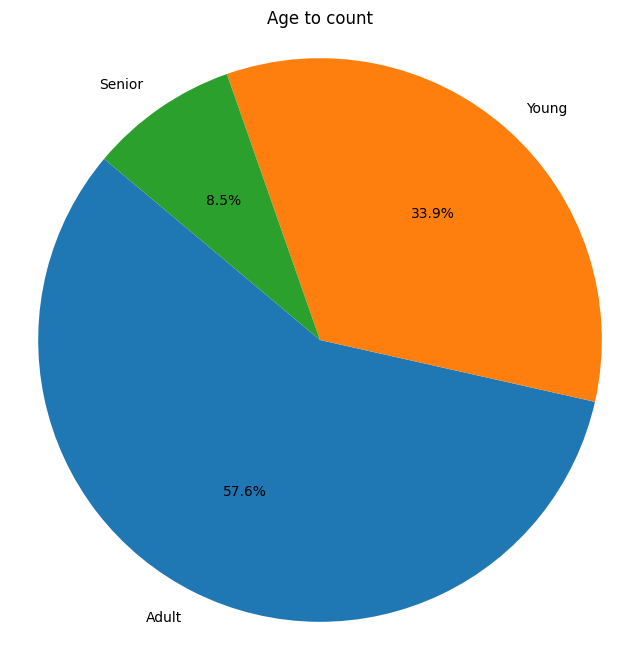

In [43]:
# Create pie chart
def generate_pie_chart(count_dict, title):
  """Converts a count dictionary into a pie chart"""
  categories = [key for key in count_dict]
  values = [count_dict[key] for key in count_dict]
  # Create a pie chart
  plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
  plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

  # Add a title
  plt.title(title)

  # Display the pie chart
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()

count_et_dict.update(count_pf_dict)
generate_pie_chart(count_et_dict, "Age to count")